In [ ]:
#get the dataset
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Income%20Data.csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Income Data.csv')

In [ ]:
df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='income',y='age',data=df)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
km.fit(df)

result = df.copy() # create explicit copy of the dataframe
result['cluster_id'] = km.predict(df)
result.head()

In [ ]:
sns.scatterplot(x='income',y='age',hue='cluster_id',data=result)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
result_df = ss.fit_transform(df)
result = result_df.copy()
result = pd.DataFrame(result, columns = df.columns)
km = KMeans(n_clusters=3, random_state=0)
km.fit(result)

result['cluster_id'] = km.predict(result)
result.head()

In [ ]:
sns.scatterplot(x='income',y='age',hue='cluster_id',data=result)
plt.show()

In [ ]:
km.cluster_centers_ # Return centroids

In [ ]:
km.inertia_ # WSS

In [ ]:
#decide on number of clusters
# Elbow
ss = StandardScaler()
df_scaled = ss.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)



inertia = []
for i in range(2,12):
  km = KMeans(n_clusters=i)
  km.fit(df_scaled)
  inertia.append(km.inertia_)

plt.plot(range(2,12),inertia,marker='x')
plt.xlabel("Number of cluster")
plt.ylabel('inertia')
plt.show()

In [ ]:
# Clusters 3 and 4 is suitable with this data

In [ ]:
km.predict([[0.8,0.9]])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
result_df = ss.fit_transform(df)
result = result_df.copy()
result = pd.DataFrame(result, columns = df.columns)
km = KMeans(n_clusters=3, random_state=0)
km.fit(result)

result['cluster_id'] = km.predict(result)
result.head()

In [ ]:
df['cluster_id'] = result['cluster_id']

In [ ]:
df.head()

In [ ]:
df.groupby('cluster_id').agg(['mean'])

# Hierarchial Clustering

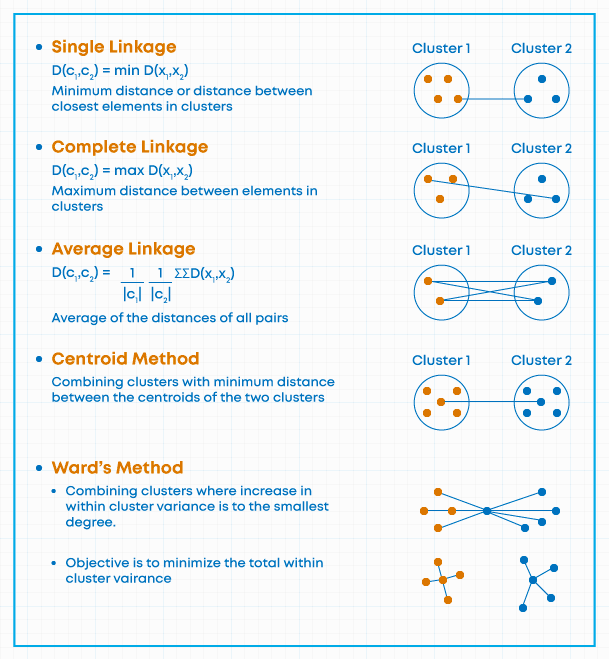

In [ ]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/beer.csv

In [ ]:
beer = pd.read_csv('beer.csv')
beer.head()

In [ ]:
beer.set_index('name',inplace=True)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg.fit_predict(beer)

In [ ]:
import scipy.cluster.hierarchy as shc

In [ ]:
beer.index

In [ ]:
plt.figure(figsize=(30,30))
dendrogram = shc.dendrogram(shc.linkage(beer, method='complete'), labels=beer.index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(30,30))
dendrogram = shc.dendrogram(shc.linkage(beer, method='ward'), labels=beer.index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(30,30))
dendrogram = shc.dendrogram(shc.linkage(beer, method='single'), labels=beer.index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(30,30))
dendrogram = shc.dendrogram(shc.linkage(beer, method='centroid'), labels=beer.index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
len(beer)